# Sim1 with PB

In [1]:
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from doe_modules.design import DOE, PlackettBurman
from doe_modules.preferences import kwarg_savefig, outputdir
from doe_modules.simulation import Sim1, MLR

In [2]:
class Config(NamedTuple):
    savefig: bool = True
    out: str = outputdir
    design: DOE = PlackettBurman
    sim_name: str = r"Model $\Phi$"
    run_names: list = None
    preffix: str = "pb_"

conf = Config()

Text(0.5, 1.0, 'Model $\\Phi$')

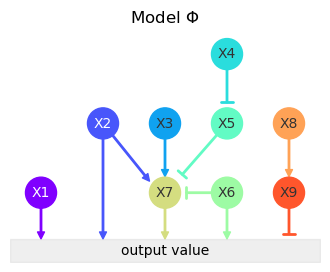

In [3]:
fig, ax = plt.subplots(figsize=(4, 3))

Sim1().plot(ax=ax)
ax.set_title(conf.sim_name)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/sim_model", **kwarg_savefig)

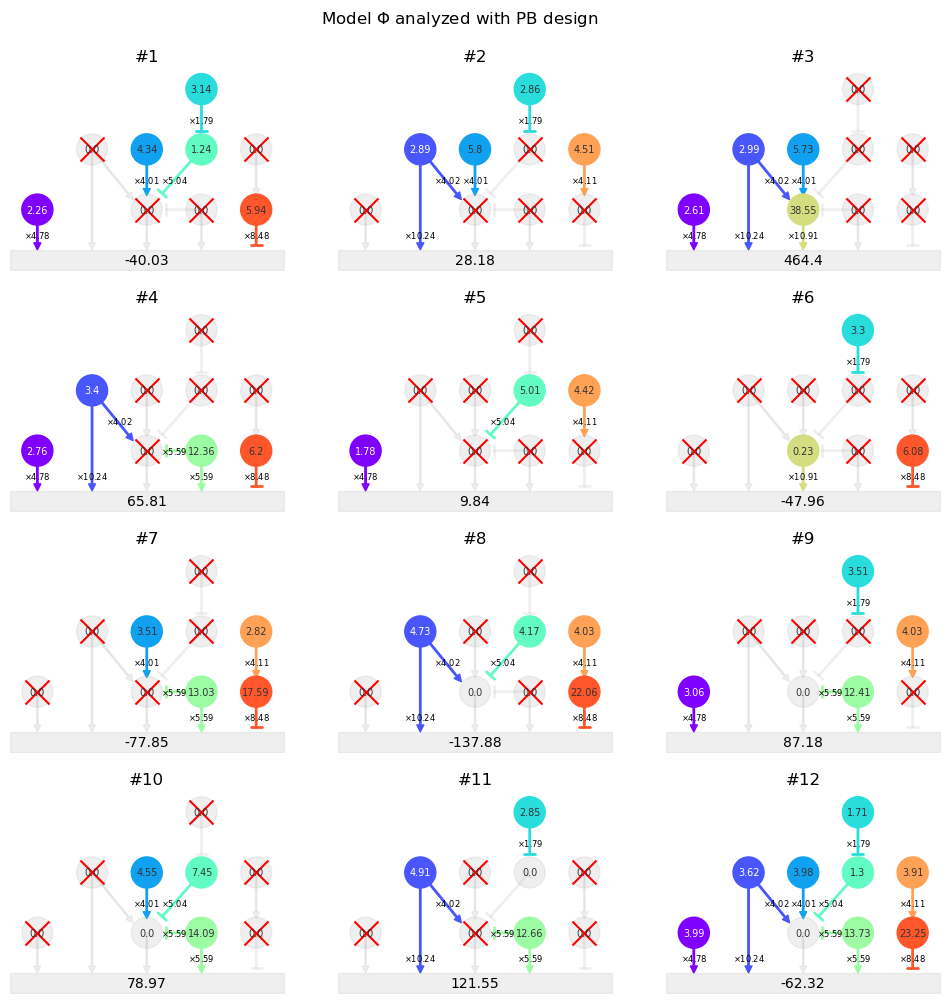

In [4]:
fig, ax = plt.subplots(4, 3, figsize=(12, 12))

model = Sim1()
model.simulate(
    design=conf.design, plot=True, ax=ax,
    titles=conf.run_names
)

fig.suptitle(f"{conf.sim_name} analyzed with {model.design().name} design", y=.93)

if conf.savefig:
    fig.savefig(f"{conf.out}/{conf.preffix}sim", **kwarg_savefig)

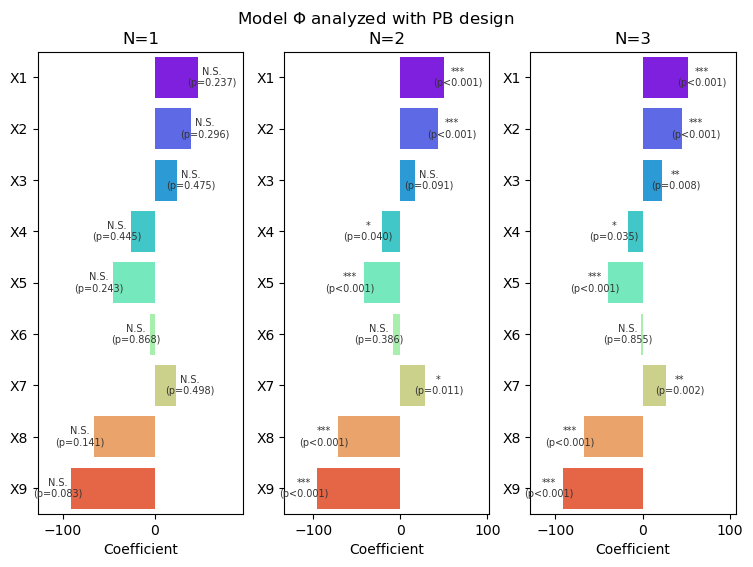

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(9, 6))

for i, a in enumerate(ax):
    model.simulate(n_rep=i + 1)
    mlr = MLR(model)
    mlr.plot(ax=a, anova=True)

fig.suptitle(f"{conf.sim_name} analyzed with {model.metadata['design']} design", y=.95)

if conf.savefig:
    fig.savefig(f"{conf.out}/{conf.preffix}sim_mlr", **kwarg_savefig)

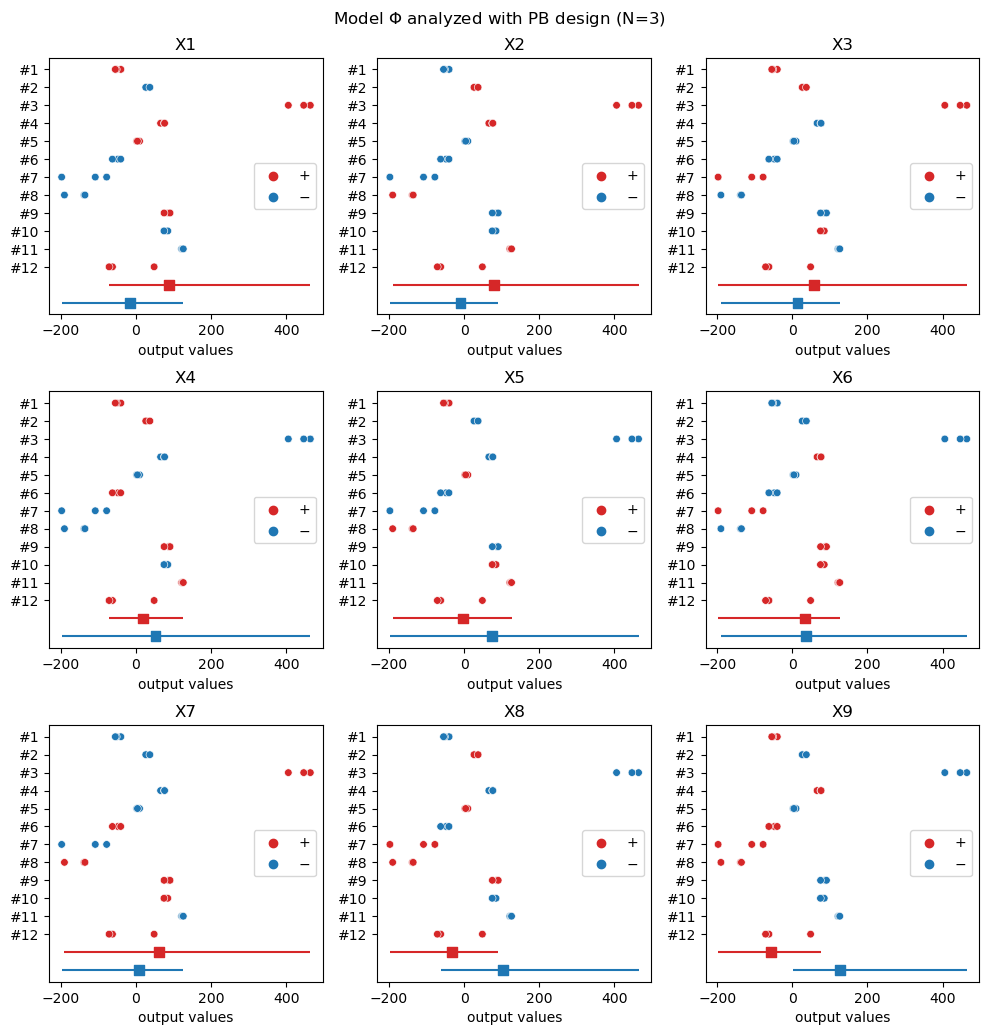

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=.3)

model.scatterview(ax=ax)

fig.suptitle(f"{conf.sim_name} analyzed with {model.metadata['design']} design (N={model.metadata['n_rep']})", y=.92);

if conf.savefig:
    fig.savefig(f"{conf.out}/{conf.preffix}sim_res_n={model.metadata['n_rep']}", **kwarg_savefig)